In [1]:
import sys
import os
from glob import glob
sys.path.append("../")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
#Input the training directory containing training image patches and labels 
TrainDataDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/StaticCenterTrainData/'
#Directory containing the train category json, model parameter and weight vector file
ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'ORStaticONEAT.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

In [3]:
#Neural network parameters
#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Training epochs, longer the better with proper chosen learning rate
epochs = 150
#Size of the gradient descent length vector, start small and use callbacs to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 4
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Grid and number of boxes for yolo
gridX = 1
gridY = 1
ImageX = 128
ImageY = 128
anchors = [0.29,0.28]



In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = gridX, gridY = gridY, ImageX = ImageX, ImageY = ImageY, nboxes = int(len(anchors))/2, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=128, ImageY=128, ModelName='ORStaticONEAT.h5', batch_size=4, box_vector=5, categories=4, depth=29, epochs=150, gridX=1, gridY=1, learning_rate=1e-06, mid_kernel=3, multievent=False, nboxes=1.0, residual=True, start_kernel=3, startfilter=48)


In [5]:
Train = NEATStaticDetection(config, anchors, TrainDataDir, KeyCategories, KeyCord, ModelDir, Model_Name, show = show)

Train.loadData()



(1689, 1, 1, 1, 9) (1689, 128, 128, 1)
number of  images:	 1689
image size:		 (1689, 128, 128, 1)
Labels:				 (1689, 1, 1, 1, 9)


loading weights













Instructions for updating:
Use `tf.cast` instead.

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 4 480         input_image[0][0]                
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 4 192         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 4 0           batch_normalization_1[0][0]      
____________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1604 samples, validate on 85 samples
Epoch 1/150
1604/1604 [==============================] - 35s 22ms/step - loss: 18.5941 - acc: 0.2276 - val_loss: 22.7103 - val_acc: 0.0471

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


<Figure size 432x288 with 0 Axes>

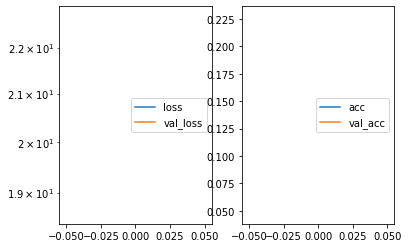

Prediction : [[[[7.0566475e-02 5.8841717e-01 2.2326916e-02 1.5777752e-01
    9.0472341e-01 1.0000000e+00 2.3205507e-30 0.0000000e+00
    0.0000000e+00]]]]
True Label :  [[0.49286348 0.50574025 0.484375   0.375      1.         0.
  1.         0.         0.        ]]


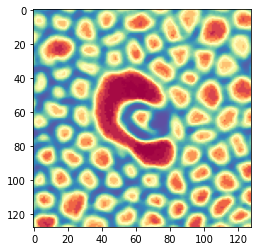

Epoch 2/150
 944/1604 [================>.............] - ETA: 10s - loss: 25.6791 - acc: 0.0434

In [ ]:
Train.TrainModel()